# ANN for predicating weather the student is going to pass or fail in georgaphy subject


## Problem Statement

create artificial neural network which can predict the wheater the student is going to pass in the exams based on his/her's previous records.

## Implementations
1. Import necessary libraries
2. Data collection
3. Data preproessing
4. standardizing dataset
5. train the model
6. conclusion

## 1. import necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

## 2. Data Collection

In [2]:
data = pd.read_csv("Students Annual Score in History geography subject.csv")

In [3]:
data.head()

,Gender,Test_01,Exam_01,Test_02,Exam_02,Test_03,Exam_03,Annual_Score,Success,Unnamed: 9
0,F,72.50,93.75,81.25,86.25,100.0,86.25,87.36,1,NaN
1,F,68.75,81.25,65.00,56.25,90.0,71.25,71.25,1,NaN
2,F,67.50,58.75,42.50,45.00,85.0,50.00,55.83,1,NaN
3,F,58.75,87.50,75.00,76.25,100.0,81.25,80.42,1,NaN
4,F,90.00,83.75,70.00,93.75,90.0,88.75,86.94,1,NaN


# 3. Data preprocessing

3.1 removing constant and irrelevant features

In [5]:
data.drop(["Gender","Unnamed: 9"],axis=1,inplace=True)

In [6]:
data.head()

,Test_01,Exam_01,Test_02,Exam_02,Test_03,Exam_03,Annual_Score,Success
0,72.50,93.75,81.25,86.25,100.0,86.25,87.36,1
1,68.75,81.25,65.00,56.25,90.0,71.25,71.25,1
2,67.50,58.75,42.50,45.00,85.0,50.00,55.83,1
3,58.75,87.50,75.00,76.25,100.0,81.25,80.42,1
4,90.00,83.75,70.00,93.75,90.0,88.75,86.94,1


3.2 check for the correct format of the dataset

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Test_01       634 non-null    float64
 1   Exam_01       634 non-null    float64
 2   Test_02       634 non-null    float64
 3   Exam_02       634 non-null    float64
 4   Test_03       634 non-null    float64
 5   Exam_03       634 non-null    float64
 6   Annual_Score  634 non-null    float64
 7   Success       634 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 39.8 KB


3.3 check the null values

In [17]:
data.isnull().sum()

,0
Test_01,0
Exam_01,0
Test_02,0
Exam_02,0
Test_03,0
Exam_03,0
Annual_Score,0
Success,0


3.4 outlier detection

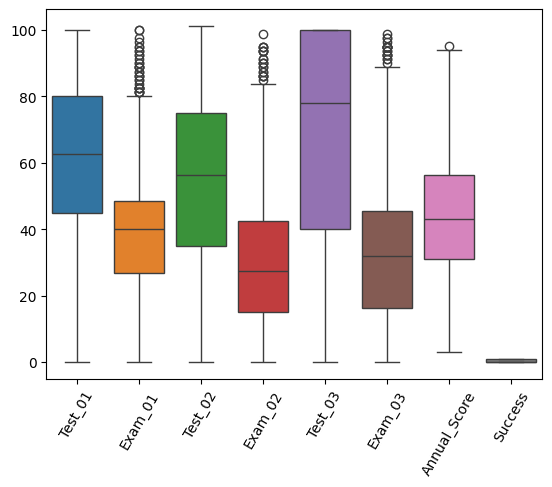

In [20]:
sns.boxplot(data)
plt.xticks(rotation=60)
plt.show()

**outlier removal**

In [21]:
for feature in data[["Exam_01","Exam_02","Exam_03","Annual_Score"]]:
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  IQR = q3 - q1
  upper_bound = q3 + 1.5 * IQR
  lower_bound = q1 - 1.5 * IQR
  data[feature] = np.where(data[feature] > upper_bound,upper_bound,data[feature])
  data[feature] = np.where(data[feature] < lower_bound,lower_bound,data[feature])

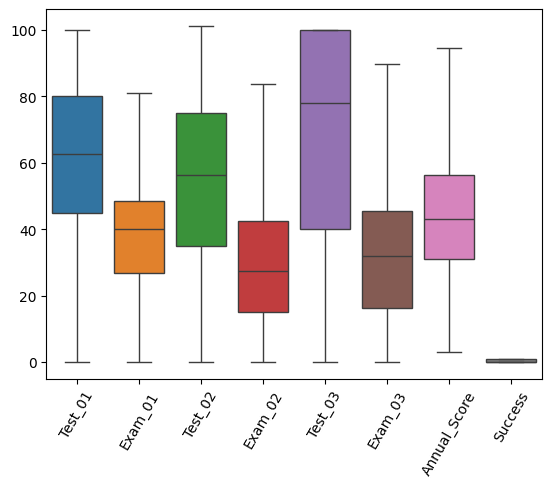

In [22]:
sns.boxplot(data)
plt.xticks(rotation=60)
plt.show()

3.5 check for balanceness of target variable

<Axes: xlabel='Success', ylabel='count'>

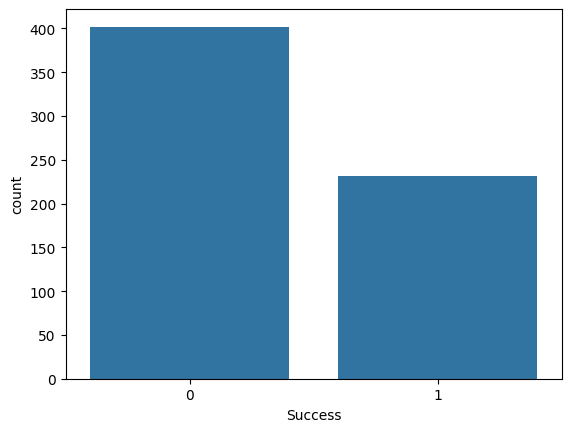

In [14]:
sns.countplot(x=data["Success"])

In [15]:
data.Success.value_counts()

,count
Success,
0,402
1,232


from the above obserrvations we can conclude that the dataset is imbalance so we need to balance it.

**balancing the dataset using SMOTE**

In [31]:
#independent features
x = data.drop("Success",axis=1)
#dependent feature
y = data["Success"]

In [32]:
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x,y)

In [39]:
y.value_counts()

,count
Success,
1,402
0,402


the dataset is balanced

## 4 standardizing the dataset

train test split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 5 creating artificial neural network

In [42]:
x_train.shape

(643, 7)

In [67]:
model = Sequential()
model.add(Dense(units = 7,activation = "relu",input_dim=x_train.shape[1])) # input layer
model.add(Dropout(0.7)) # adding dropout layer with 20% rate

model.add(Dense(units = 4,activation = "relu")) # hidden layer 1
model.add(Dropout(0.7))
model.add(Dense(units = 1,activation = "sigmoid")) # output layer

In [68]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [69]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
model_hist = model.fit(x_train,y_train,epochs=100,batch_size=20,validation_data=(x_test,y_test))

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4935 - loss: 0.9094 - val_accuracy: 0.3230 - val_loss: 0.7642
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4398 - loss: 0.8626 - val_accuracy: 0.4286 - val_loss: 0.7239
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4546 - loss: 0.8383 - val_accuracy: 0.5031 - val_loss: 0.6956
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5318 - loss: 0.7709 - val_accuracy: 0.5590 - val_loss: 0.6761
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5391 - loss: 0.7447 - val_accuracy: 0.6273 - val_loss: 0.6620
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5333 - loss: 0.7721 - val_accuracy: 0.6957 - val_loss: 0.6507
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5753 - loss: 0.7280 - val_accuracy: 0.7453 - val_loss: 0.6391
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5542 - loss: 0.7114 - val_accuracy: 0.8199 - v

In [71]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1080 
Accuracy: 100.00%


## 6. conclusion

created the ann model to predict the weather the student is going to pass in the geography subject.